In [2]:
!pip install d3rlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 973.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.2.1
    Uninstalling gymnasium-1.2.1:
      Successfully uninstalled gymnasium-1.2.1


In [32]:
import gymnasium as gym
from d3rlpy.algos import SACConfig
from d3rlpy.dataset import MDPDataset
import numpy as np

In [37]:
env = gym.make("Pendulum-v1", max_episode_steps=200)

In [41]:
sac = SACConfig().create(device="cpu")

In [42]:
sac.fit_online(env, n_steps=1000)

2025-12-04 00:13.54 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-12-04 00:13.54 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-12-04 00:13.54 [info     ] Action size has been automatically determined. action_size=1
2025-12-04 00:13.54 [debug    ] Building model...             
2025-12-04 00:13.54 [debug    ] Model has been built.         
2025-12-04 00:13.54 [info     ] Directory is created at d3rlpy_logs/SAC_online_20251204001354
2025-12-04 00:13.54 [info     ] Parameters                     params={'observation_shape': [3], 'action_size': 1, 'config': {'type': 'sac', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params'

  0%|          | 0/1000 [00:00<?, ?it/s]

In [46]:
observations = []
actions = []
rewards = []
terminals = []
timeouts = []

In [52]:
obs, _ = env.reset()
step_count = 0
max_episode_steps = env.spec.max_episode_steps

In [61]:
for _ in range(5000):
    action = sac.predict(obs[None, :])[0]
    next_obs, reward, terminated, truncated, info = env.step(action)
    
    observations.append(obs)
    actions.append(action)
    rewards.append([reward])
    
    terminals.append([terminated])
    timeouts.append([truncated])  
    
    obs = next_obs
    step_count += 1
    if terminated or truncated:
        obs, _ = env.reset()
        step_count = 0

dataset = MDPDataset(
    observations=np.array(observations),
    actions=np.array(actions),
    rewards=np.array(rewards),
    terminals=np.array(terminals),
    timeouts=np.array(timeouts)
)
dataset.dump("pendulum_medium_replay.h5")


2025-12-04 00:15.10 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-12-04 00:15.10 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-12-04 00:15.10 [info     ] Action size has been automatically determined. action_size=1


In [65]:
import gymnasium as gym
from d3rlpy.algos import SACConfig, BCConfig, IQLConfig
from d3rlpy.dataset import MDPDataset
import numpy as np

In [72]:
env = gym.make("Pendulum-v1", max_episode_steps=200)

In [73]:
sac = SACConfig().create(device="cpu")
sac.fit_online(env, n_steps=1000) 

2025-12-04 00:16.29 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-12-04 00:16.29 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-12-04 00:16.29 [info     ] Action size has been automatically determined. action_size=1
2025-12-04 00:16.29 [debug    ] Building model...             
2025-12-04 00:16.29 [debug    ] Model has been built.         
2025-12-04 00:16.29 [info     ] Directory is created at d3rlpy_logs/SAC_online_20251204001629
2025-12-04 00:16.29 [info     ] Parameters                     params={'observation_shape': [3], 'action_size': 1, 'config': {'type': 'sac', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params'

  0%|          | 0/1000 [00:00<?, ?it/s]

In [102]:
observations, actions, rewards, terminals, timeouts = [], [], [], [], []
obs, _ = env.reset()

In [131]:
for _ in range(5000):
    action = sac.predict(obs[None, :])[0]
    next_obs, reward, terminated, truncated, _ = env.step(action)

    observations.append(obs)
    actions.append(action)
    rewards.append([reward])
    terminals.append([terminated])
    timeouts.append([truncated])

    obs = next_obs
    if terminated or truncated:
        obs, _ = env.reset()

In [132]:
dataset = MDPDataset(
    observations=np.array(observations),
    actions=np.array(actions),
    rewards=np.array(rewards),
    terminals=np.array(terminals),
    timeouts=np.array(timeouts)
)

2025-12-04 00:18.20 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-12-04 00:18.20 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-12-04 00:18.20 [info     ] Action size has been automatically determined. action_size=1


In [133]:
bc = BCConfig().create(device="cpu")
bc.fit(dataset, n_steps=5000)

2025-12-04 00:18.23 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]), action_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)]), action_space=<ActionSpace.CONTINUOUS: 1>, action_size=1)
2025-12-04 00:18.23 [debug    ] Building models...            
2025-12-04 00:18.23 [debug    ] Models have been built.       
2025-12-04 00:18.23 [info     ] Directory is created at d3rlpy_logs/BC_20251204001823
2025-12-04 00:18.23 [info     ] Parameters                     params={'observation_shape': [3], 'action_size': 1, 'config': {'type': 'bc', 'params': {'batch_size': 100, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none', 'params': {}}, 'compile_graph': False, 'learning_rate': 0.001, 'policy_type': 'deterministic', 'optim_factory': 

[]

In [134]:
iql = IQLConfig().create(device="cpu")
iql.fit(dataset, n_steps=10000)

2025-12-04 00:18.42 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]), action_signature=Signature(dtype=[dtype('float32')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)]), action_space=<ActionSpace.CONTINUOUS: 1>, action_size=1)
2025-12-04 00:18.42 [debug    ] Building models...            
2025-12-04 00:18.42 [debug    ] Models have been built.       
2025-12-04 00:18.42 [info     ] Directory is created at d3rlpy_logs/IQL_20251204001842
2025-12-04 00:18.42 [info     ] Parameters                     params={'observation_shape': [3], 'action_size': 1, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none', 'params': {}}, 'compile_graph': False, 'actor_learning_rate': 0.0003, 'critic_learning_rate': 0.0003, 'actor_o

Epoch 1/1:   0%|          | 0/10000 [00:00<?, ?it/s]

2025-12-04 00:19.53 [info     ] IQL_20251204001842: epoch=1 step=10000 epoch=1 metrics={'time_sample_batch': 0.001701163387298584, 'time_algorithm_update': 0.005327528643608094, 'critic_loss': 0.7953008447378874, 'q_loss': 0.7751801960229874, 'v_loss': 0.020120646735288027, 'actor_loss': -2.6498811291433872, 'time_step': 0.00712805814743042} step=10000
2025-12-04 00:19.53 [info     ] Model parameters are saved to d3rlpy_logs/IQL_20251204001842/model_10000.d3


[(1,
  {'time_sample_batch': 0.001701163387298584,
   'time_algorithm_update': 0.005327528643608094,
   'critic_loss': 0.7953008447378874,
   'q_loss': 0.7751801960229874,
   'v_loss': 0.020120646735288027,
   'actor_loss': -2.6498811291433872,
   'time_step': 0.00712805814743042})]

In [156]:
def evaluate_agent(env, agent, n_trials=5):
    rewards = []
    for _ in range(n_trials):
        obs, _ = env.reset()
        done = False
        total_reward = 0.0
        while not done:
            action = agent.predict(obs[None, :])[0]
            obs, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            done = terminated or truncated
        rewards.append(total_reward)
    return np.mean(rewards)

In [159]:
bc_score = evaluate_agent(env, bc, n_trials=5)
iql_score = evaluate_agent(env, iql, n_trials=5)
sac_score = evaluate_agent(env, sac, n_trials=5)

print("avg награда bc:", bc_score)
print("avg награда iql:", iql_score)
print("avg награда sac:", sac_score)

avg награда bc: -1232.685649490283
avg награда iql: -1387.9081715625175
avg награда sac: -1414.7335774183675


In [186]:
def evaluate_agent_episodes(env, agent, n_episodes=10):
    episode_rewards = []
    for _ in range(n_episodes):
        obs, _ = env.reset()
        done = False
        total_reward = 0.0
        while not done:
            action = agent.predict(obs[None, :])[0]
            obs, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            done = terminated or truncated
        episode_rewards.append(total_reward)
    return episode_rewards

In [191]:
n_eval_episodes = 20
bc_rewards = evaluate_agent_episodes(env, bc, n_eval_episodes)
iql_rewards = evaluate_agent_episodes(env, iql, n_eval_episodes)
sac_rewards = evaluate_agent_episodes(env, sac, n_eval_episodes)

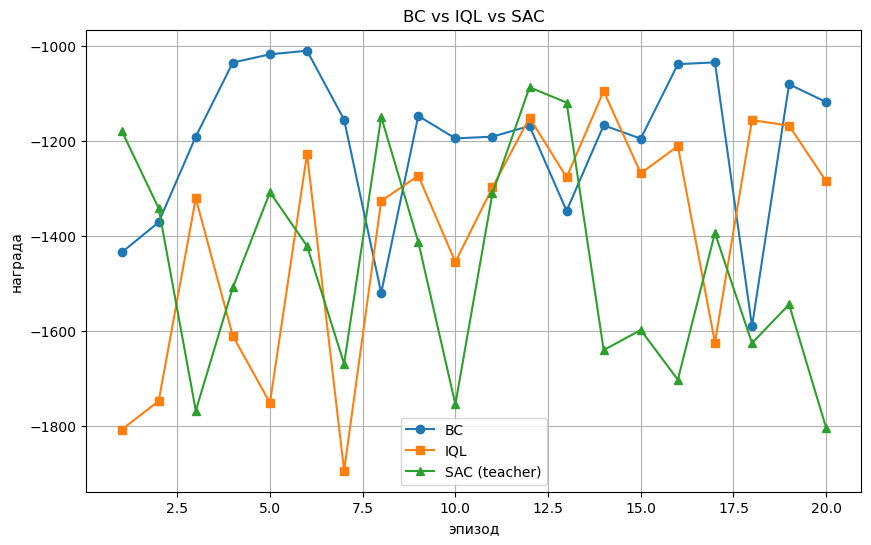

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1, n_eval_episodes+1), bc_rewards, label="BC", marker='o')
plt.plot(range(1, n_eval_episodes+1), iql_rewards, label="IQL", marker='s')
plt.plot(range(1, n_eval_episodes+1), sac_rewards, label="SAC (teacher)", marker='^')

plt.xlabel("эпизод")
plt.ylabel("награда")
plt.title("BC vs IQL vs SAC")
plt.legend()
plt.grid(True)
plt.show()